In [1]:
import os
os.chdir(os.path.join('..', '..', '..'))
print(os.getcwd())

/Users/eharkin/Documents/projects/5HTGIF


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from ezephys import pltools

from grr.Tools import stripNan

In [3]:
IMG_PATH = os.path.join('figs', 'ims', 'writeup', 'fig1')
NOTEBOOK_PATH = os.path.join('figs', 'scripts', 'writeup')

plt.style.use(os.path.join(NOTEBOOK_PATH, 'publication_figure_style.dms'))

In [4]:
data = {
    celltype: pd.read_csv(os.path.join('data', 'processed', celltype, 'current_steps_gain.csv'))
    for celltype in ['5HT', 'GABA']
}
for celltype in data:
    data[celltype]['cell_type'] = celltype
param_df = pd.concat([data[celltype] for celltype in data], axis=0)
param_df.reset_index(drop=True, inplace=True)

param_df

,gain,is_monotonic,rheobase,cell_type
0,0.074977,True,8.766868,5HT
1,0.037190,True,54.663452,5HT
2,0.085683,True,60.045643,5HT
3,0.042441,True,64.524641,5HT
4,0.106712,True,16.735346,5HT
5,0.039304,True,59.471666,5HT
6,0.044860,True,44.279461,5HT
7,0.051668,True,8.477907,5HT
8,0.052506,True,50.878105,5HT
9,0.030544,True,30.874911,5HT


In [5]:
param_df['gain'] *= 1e3  # Convert to Hz/nA from Hz/pA

In [6]:
param_df.groupby('cell_type').mean()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,52.244907,1.0,33.793841
GABA,138.857784,0.5,11.318860


In [7]:
param_df.groupby('cell_type').sem()

,gain,is_monotonic,rheobase
cell_type,,,
5HT,5.380999,0.000000,5.098240
GABA,32.953326,0.138675,4.272922


In [8]:
figsize=(0.7, 1)

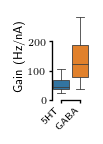

In [9]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.5, right=0.95, top=0.97, bottom=0.25)
sns.boxplot('cell_type', 'gain', data=param_df)
plt.ylim(0, plt.ylim()[1])
plt.xlabel('')
plt.ylabel(r'Gain (Hz/nA)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'gain_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'rheobase_conductance_comparison.svg'))

In [10]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'gain']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'gain']),
    alternative='two-sided'
)

MannwhitneyuResult(statistic=17.0, pvalue=0.0076429063839584055)

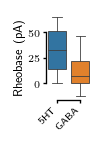

In [11]:
plt.figure(figsize=figsize)

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.25)
sns.boxplot('cell_type', 'rheobase', data=param_df)
plt.xlabel('')
plt.ylabel(r'Rheobase (pA)')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'rheobase_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'rheobase_conductance_comparison.svg'))

In [12]:
stats.mannwhitneyu(
    stripNan(param_df.loc[param_df['cell_type'] == '5HT', 'rheobase']),
    stripNan(param_df.loc[param_df['cell_type'] == 'GABA', 'rheobase']),
    alternative='two-sided'
)

MannwhitneyuResult(statistic=193.0, pvalue=0.0035282206147545796)

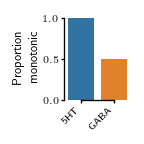

In [17]:
plt.figure(figsize=(1, 1))

plt.subplot(111)
plt.subplots_adjust(left=0.4, right=0.95, top=0.97, bottom=0.25)
sns.barplot('cell_type', 'is_monotonic', data=param_df, ci=None)
plt.ylabel('Proportion\nmonotonic')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
pltools.hide_border('tr', trim=True)

if IMG_PATH is not None:
    plt.savefig(os.path.join(IMG_PATH, 'monotonic_comparison.png'))
    plt.savefig(os.path.join(IMG_PATH, 'monotonic_comparison.svg'))

In [14]:
contingency = [
    [sum(param_df.loc[param_df['cell_type'] == '5HT', 'is_monotonic']),
    sum(~param_df.loc[param_df['cell_type'] == '5HT', 'is_monotonic'])],
    [sum(param_df.loc[param_df['cell_type'] == 'GABA', 'is_monotonic']),
    sum(~param_df.loc[param_df['cell_type'] == 'GABA', 'is_monotonic'])],
]
stats.chi2_contingency(contingency)

(8.30531587635054, 0.003952920681359638, 1, array([[13.16129032,  3.83870968],
        [10.83870968,  3.16129032]]))

Second number is the p-value.